In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
%matplotlib inline

In [2]:
# FUNCTIONS YOU CAN USE:
#     analyses(filepath) spits out a nifty heatmap to let you check correlation between variables
#
#     regress(option, df) churns out a saucy graph of the linear regression for the variables you provided, where
#       option is 'snr_total' or 'tsnr', whichever you want to make the dependent variable of your model
#       df is the pandas DataFrame containing your data. To modify which variables you want in your model, you'll
#             have to directly modify the regress function

In [3]:
# NOTABLE FILENAMES
# ../data/extractions/p2_BOLD.csv                  - all dates for p2_BOLD
# ../data/extractions/p2Xs4X35mm_BOLD.csv          - all dates for p2Xs4X35mm
# ../data/extractions/p2_BOLD_snr.csv              - from 20170130 onwards, snr_total inclusive
# ../data/extractions/p2Xs4X35mm_BOLD.csv          - from 20170130 onwards, snr_total inclusive

In [4]:
def analyses(filepath):
    files = pd.read_csv(filepath)
    
    # FIRST CHECK: CONVERSION SOFTWARE VERSIONS
    check = files.iloc[0, 7]
    valid = True
    
    for i in files.index:
        if check != files.iloc[i, 7]:
            valid = False
            
    print("All Conversion Softwares are the same: " + str(valid))
    
    # SECOND CHECK: HEATMAP
    sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=240, h_pos=10, n=9, sep=1, center="dark"), center=0)

In [19]:
def regress(option, df):
    # creates a regression graph plotted against actual data from certain QA metrics
    # option: takes str value of either snr_total or tsnr to model against
    # df    : takes pandas DataFrame with data
    
    # checks parameters passed in
    if option != 'snr_total' and option != 'tsnr':
        return "Option must be snr_total or tsnr"
    
    elif type(df) is not pd.core.frame.DataFrame:
        return "DataFrame must be of type pandas.core.frame.DataFrame"
    
    # preparing sin and cos curves to add to the model
    n = len(df)
    date = str(df.iat[0,0])
    values = [np.sin(np.pi*i/(26)) for i in range(n)]
    values2 = [np.cos(np.pi*i/(26)) for i in range(n)]
    dates = [dt.datetime(int(date[:4]), int(date[4:6]), int(date[6:])) + dt.timedelta(days = i*7) for i in range(n)]

    sin = pd.DataFrame(values)
    sin.columns = ['sin']
    
    cos = pd.DataFrame(values2)
    cos.columns = ['cos']
    
    df = df.join(sin)
    df = df.join(cos)
    
    # Converting date to a format that can be parsed by statsmodels API
    df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
    df['Date2'] = df['Date'].map(pd.datetime.toordinal)
    
    # Assigning independent and dependent variables
    X = df[["Date2", "TxRefAmp", "SAR", "AcquisitionTime",
       'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
        'Shim5', 'Shim6', 'Shim7', 'Shim8', 'sin', 'cos']]
    X = sm.add_constant(X)
    y = df[option]
    
    # modeling predictions
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # converting the above predictions to a format that can be plotted
    prediction = predictions.to_frame()
    prediction.columns = ['model']
    df2 = df.join(prediction)
    
    # plotting the graph
    plt.figure(figsize=(15, 6))

    ax = sns.lineplot(x="Date", y=option, data=df2, color="#ff9933")
    ax_txrefamp = plt.twinx()
    sns.lineplot(x="Date", y="model", data=df2, color="r", ax=ax)
    ax.legend([option, 'predicted value'])

    plt.plot(dates,values, color='b', label="sin")
    plt.plot(dates,values2, color='#9999ff', label="cos")
    plt.legend(['sin', 'cos'], loc='upper left')
    
    # giving additional data
    print(model.summary())

All Conversion Softwares are the same: True


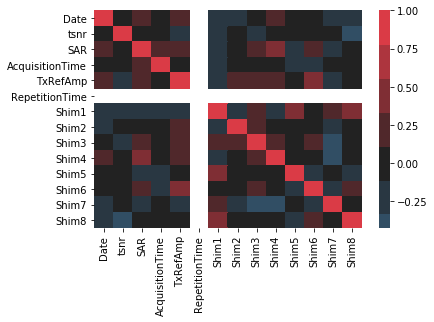

In [6]:
analyses('../data/extractions/p2_BOLD.csv')

All Conversion Softwares are the same: True


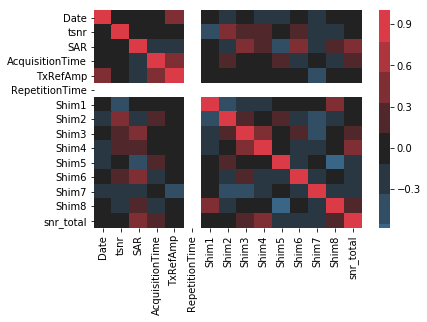

In [7]:
analyses('../data/extractions/p2_BOLD_snr.csv')

In [8]:
files = pd.read_csv('../data/extractions/p2_BOLD.csv')
df = pd.DataFrame(files,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8'])

In [9]:
# p2Xs4X35mm_BOLD.csv
files2 = pd.read_csv('../data/extractions/p2Xs4X35mm_BOLD.csv')
df2 = pd.DataFrame(files2,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8'])

In [10]:
files3 = pd.read_csv('../data/extractions/p2_BOLD_snr.csv')
df3 = pd.DataFrame(files3,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8', 'snr_total'])

In [18]:
files4 = pd.read_csv('../data/extractions/p2Xs4X35mm_BOLD_snr.csv')
df4 = pd.DataFrame(files4,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8', 'snr_total'])

1970-01-01 00:00:00.020171030


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:              snr_total   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1.816
Date:                Thu, 28 Feb 2019   Prob (F-statistic):             0.0852
Time:                        15:02:21   Log-Likelihood:                -90.834
No. Observations:                  44   AIC:                             211.7
Df Residuals:                      29   BIC:                             238.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Date2               0.0033      0.010     

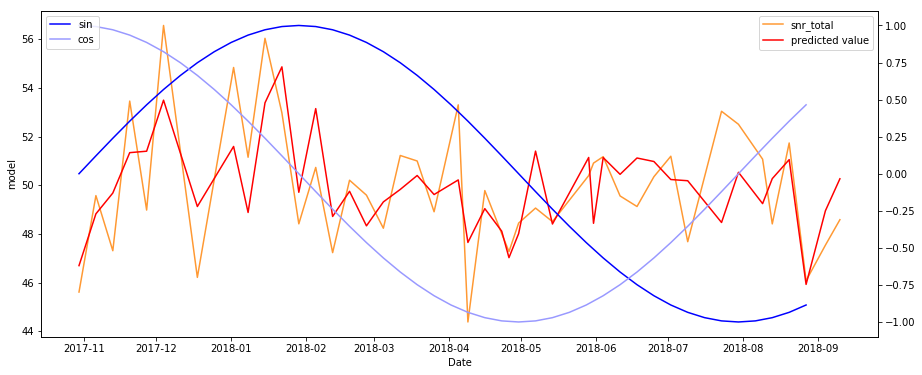

In [20]:
regress('snr_total', df3)

In [23]:
# F-TEST FOR P2 AND P2X WITH SHIM
#P2
print(model.f_test("Shim1 = Shim2 = Shim3 = Shim4 = Shim5 = Shim6 = Shim7 = Shim8 = 0"))

#P2X
print(model3.f_test("Shim1 = Shim2 = Shim3 = Shim4 = Shim5 = Shim6 = Shim7 = Shim8 = 0"))

<F test: F=array([[2.3262108]]), p=0.027575534459194063, df_denom=74, df_num=8>
<F test: F=array([[3.06936539]]), p=0.004852444946259046, df_denom=74, df_num=8>


In [24]:
# F-TEST FOR P2 AND P2X WITH SIN AND COS
# P2
print(model.f_test("sin = cos = 0"))

#P2X
print(model3.f_test("sin = cos = 0"))

<F test: F=array([[2.07840711]]), p=0.13237324988403779, df_denom=74, df_num=2>
<F test: F=array([[1.01235771]]), p=0.36833747975766434, df_denom=74, df_num=2>
